___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot (deprecated, use 'catplot' instead)
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [227]:
import seaborn as sns
%matplotlib inline

In [228]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

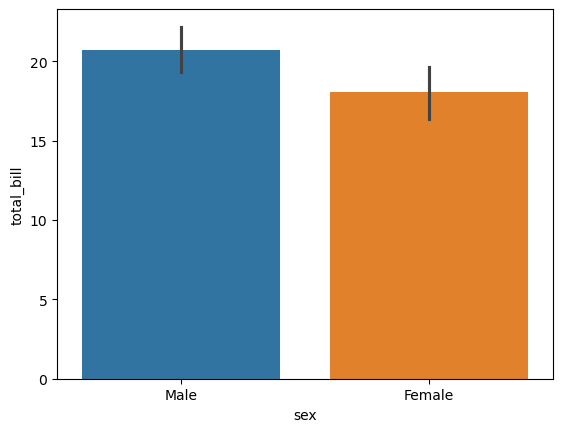

In [229]:
sns.barplot(x='sex',y='total_bill',data=tips, hue='sex');
'''
This creates a bar chart where:
    1) The x-axis shows the unique categories of the 'sex' column ('Male' and 'Female').
    2) The y-axis shows the average 'total_bill' for each sex.
    3) The height of each bar represents the mean total bill for that category.
    4) Error bars (by default) represent a 95% confidence interval for the mean.
By default, in Seaborn’s barplot, these lines show the 95% confidence interval (CI) for the mean value.
So in your plot:
Each bar shows the average 'total_bill' for each 'sex' (Male vs. Female).
Each black vertical line shows the range within which the true population mean is expected to lie with 95% confidence.
''';

In [230]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

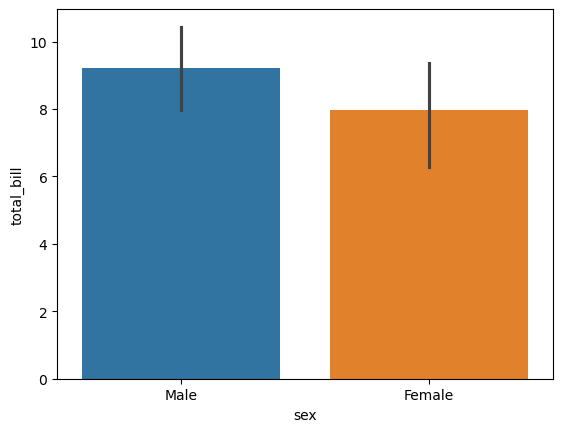

In [231]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std, hue='sex');
'''
This tells Seaborn:
"For each sex group, plot the standard deviation of total_bill."

What Changes Here:
Normally, sns.barplot() shows the mean of the y variable (total_bill) by default.
But with estimator=np.std, you're asking it to show the spread (variability) of the data instead.

What You'll See:
A bar for Male and a bar for Female, where:
Height = standard deviation of total bills for that group.
Error bars = by default, Seaborn will still try to show a confidence interval around the estimator, though it’s not always meaningful for std.

If you're just interested in the raw std (no CI bars), turn off the error bars:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std, ci=None);
''';

In [232]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [233]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [234]:
sum(tips['sex'] == 'Female')

87

In [235]:
# tips[tips['sex'] == 'Female']
tips[tips['sex'] == 'Female'].shape[0]
#tips[...]: You're saying "Give me some rows from this table."

87

In [236]:
sum(tips['sex'] == 'Male')

157

In [237]:
# tips['sex'].value_counts()
tips['sex'].value_counts()['Female']

87

In [238]:
tips['day'].value_counts()
# tips['day'].value_counts().shape    #(4,)

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [239]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [240]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

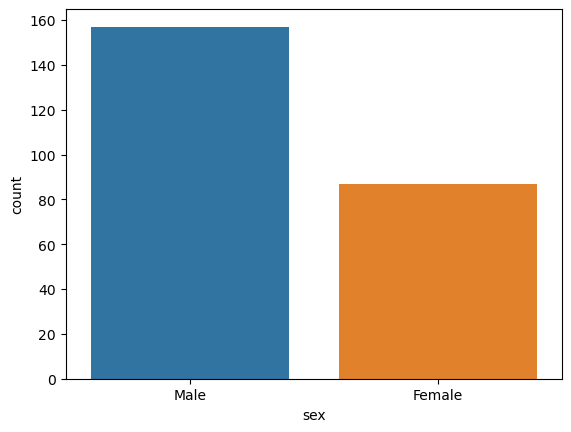

In [241]:
sns.countplot(x='sex',data=tips, hue= 'sex');   #similar to tips['sex'].value_counts()

## boxplot and violinplot

boxplots and violinplots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

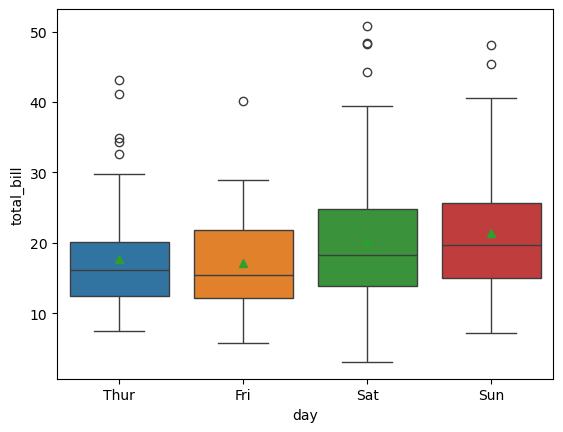

In [242]:
sns.boxplot(x="day", y="total_bill", data=tips,hue= 'day', showmeans=True); #We're gonna try to see the distribution of total bill per day.

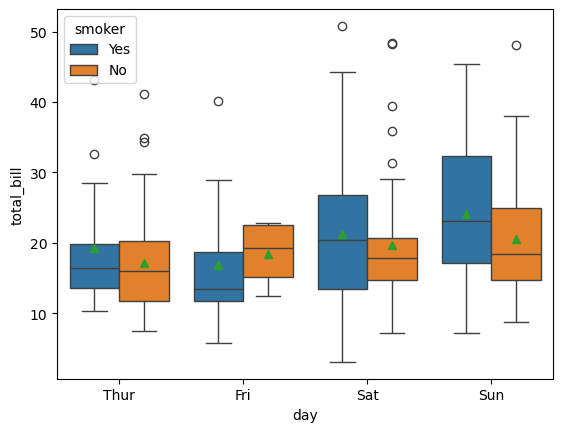

In [243]:
sns.boxplot(x="day", y="total_bill", data=tips,hue= 'smoker', showmeans=True); 

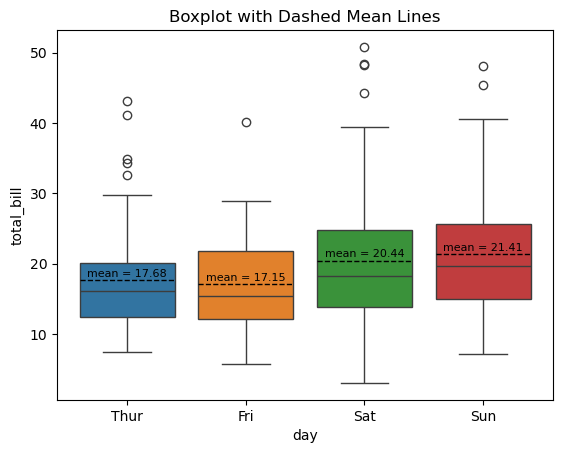

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64
['Fri', 'Sat', 'Sun', 'Thur']
CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category', name='day')
['Fri', 'Sat', 'Sun', 'Thur']
[(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]


In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
tips = sns.load_dataset("tips")

# Create the boxplot without showing the mean
sns.boxplot(x="day", y="total_bill", data=tips, hue='day', showmeans=False)
'''
x='day': Group the data by day (Thur, Fri, Sat, Sun).
y='total_bill': Plot total bill amounts.
hue='day': Each box gets its own color based on the day — although here it's redundant because hue is the same as x. Usually hue is used for a second category like sex.
showmeans=False: Don't show the mean in the default boxplot.
'''

# Compute the means per 'day'
group_means = tips.groupby("day", observed=True)["total_bill"].mean() #Calculates the mean total_bill for each day. observed=True: Only considers days that actually appear in the dataset.


## Overlay Dashed Mean Lines:
# Get the unique categories in the same order as on the x-axis
# categories = tips["day"].unique()

# Draw horizontal dashed mean lines over each box
for i, cat in enumerate(group_means.index): #print(list(enumerate(group_means.index)))      [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
    mean = group_means[cat]
    plt.hlines(y=mean, xmin=i - 0.4, xmax=i + 0.4, colors="black", linestyles="--", linewidth=1)
    plt.text(i, mean + 0.5, f"mean = {mean:.2f}", ha="center", fontsize=8)
'''
group_means.index: ['Thur', 'Fri', 'Sat', 'Sun'].
enumerate(group_means.index): [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
For each i (position on the x-axis), it:
    -Draws a horizontal dashed line using plt.hlines(...) at the mean value.
    -Places a text label slightly above the line to display the mean.
Why xmin=i - 0.4 and xmax=i + 0.4? This ensures the line spans the width of the box plot for that day (approximate width of the box is 0.8 units).

Places a text label showing the mean value above the line.
i: x-position (centered above the box).
mean + 0.5: y-position (slightly above the dashed line).
f"mean = {mean:.2f}": formats the mean to 2 decimal places (e.g., 20.44).
ha="center": horizontally center the text above the category.
fontsize=8: makes the text smaller.
'''
plt.title("Boxplot with Dashed Mean Lines")
plt.show()
# print(group_means.shape)  #(4,)
# print(type(group_means))      #<class 'pandas.core.series.Series'>
print(group_means)
print(sorted(group_means.index))
# print(categories) #Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
print(group_means.index)    #['Thur', 'Fri', 'Sat', 'Sun']
print(sorted(group_means.index))    #['Fri', 'Sat', 'Sun', 'Thur']
print(list(enumerate(group_means.index)));  #[(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]

total_bill    17.795
tip            2.900
size           2.000
dtype: float64
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64


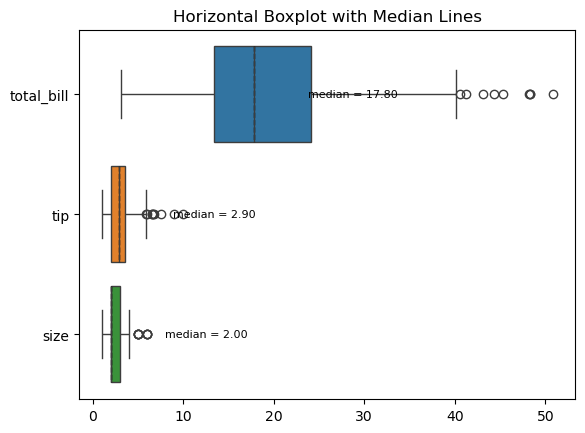

In [245]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,orient='h');
#You're plotting all numeric columns in the tips DataFrame as horizontal boxplots. 
print(tips.median(numeric_only=True))
group_medians = tips.median(numeric_only=True)
group_meanss = tips.mean(numeric_only=True)
print(group_meanss)
# Overlay vertical dashed lines at medians with labels
for i, col in enumerate(group_medians.index): #print(list(enumerate(group_means.index)))      [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
    median = group_medians[col]
    plt.vlines(x=median, ymin=i - 0.4, ymax=i + 0.4, colors="black", linestyles="--", linewidth=1)
    plt.text(median+6, i, f"median = {median:.2f}", va="center", fontsize=8)

plt.title("Horizontal Boxplot with Median Lines");

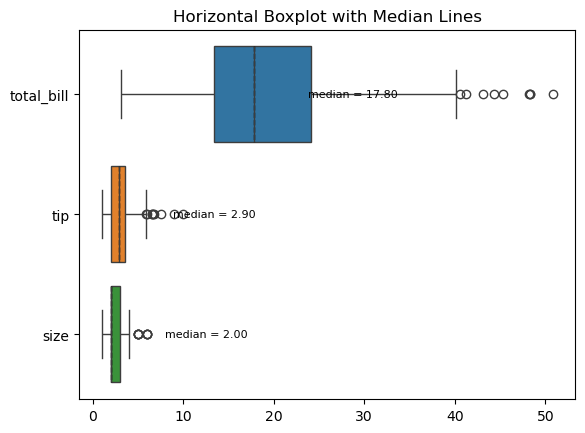

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
tips = sns.load_dataset("tips")

# Create horizontal boxplots for all numeric columns
sns.boxplot(data=tips, orient='h')

# Compute medians for numeric columns
group_medians = tips.median(numeric_only=True)

# Overlay vertical dashed lines at medians with labels
for i, col in enumerate(group_medians.index):
    median = group_medians[col]
    plt.vlines(x=median, ymin=i - 0.4, ymax=i + 0.4, colors="black", linestyles="--", linewidth=1)
    plt.text(median+6, i, f"median = {median:.2f}", va="center", fontsize=8)

plt.title("Horizontal Boxplot with Median Lines")
plt.show()


day   smoker
Thur  Yes       19.190588
      No        17.113111
Fri   Yes       16.813333
      No        18.420000
Sat   Yes       21.276667
      No        19.661778
Sun   Yes       24.120000
      No        20.506667
Name: total_bill, dtype: float64
19.19058823529412
19.19058823529412
day   smoker
Thur  Yes       16.470
      No        15.950
Fri   Yes       13.420
      No        19.235
Sat   Yes       20.390
      No        17.820
Sun   Yes       23.100
      No        18.430
Name: total_bill, dtype: float64
[(0, ('Thur', 'Yes')), (1, ('Thur', 'No')), (2, ('Fri', 'Yes')), (3, ('Fri', 'No')), (4, ('Sat', 'Yes')), (5, ('Sat', 'No')), (6, ('Sun', 'Yes')), (7, ('Sun', 'No'))]
[(0, ('Thur', 'Yes')), (1, ('Thur', 'No')), (2, ('Fri', 'Yes')), (3, ('Fri', 'No')), (4, ('Sat', 'Yes')), (5, ('Sat', 'No')), (6, ('Sun', 'Yes')), (7, ('Sun', 'No'))]


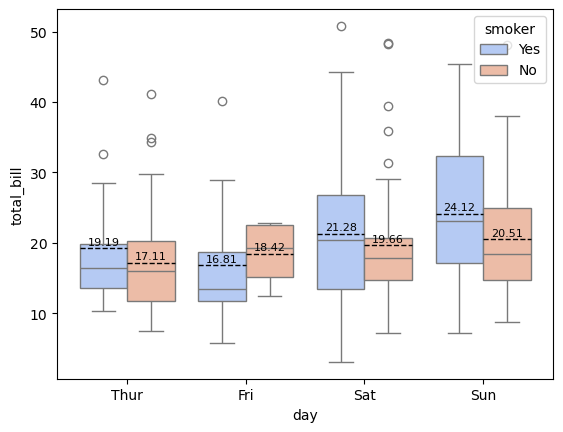

In [247]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")
group_daysmoker_mean = tips.groupby(["day", 'smoker'], observed=True)["total_bill"].mean()
# print(group_daysmoker_mean.shape)   #(8,)
print(group_daysmoker_mean)
print(group_daysmoker_mean[('Thur', 'Yes')])
print(group_daysmoker_mean.iloc[0])
group_daysmoker_median = tips.groupby(["day", 'smoker'], observed=True)["total_bill"].median()
print(group_daysmoker_median)
print(list(enumerate(group_daysmoker_mean.index))) 
print(list(enumerate(group_daysmoker_median.index)))
# for i, cat in enumerate(group_daysmoker_mean.index): #print(list(enumerate(group_means.index)))      [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
#     mean = group_daysmoker_mean[cat]
#     plt.hlines(y=mean, xmin=i - 0.4, xmax=i, colors="black", linestyles="--", linewidth=1)
#     plt.text(i, mean + 0.5, f"mean = {mean:.2f}", ha="center", fontsize=8);

day_order = ['Thur', 'Fri', 'Sat', 'Sun']
smoker_order = ['Yes', 'No']
for i, (day, smoker) in enumerate(group_daysmoker_mean.index):  #list(enumerate(group_daysmoker_mean.index))     [(0, ('Thur', 'Yes')), (1, ('Thur', 'No')), (2, ('Fri', 'Yes')), (3, ('Fri', 'No')), (4, ('Sat', 'Yes')), (5, ('Sat', 'No')), (6, ('Sun', 'Yes')), (7, ('Sun', 'No'))]
    mean = group_daysmoker_mean[(day, smoker)]

    # Get index for 'day' and 'smoker'
    day_index = day_order.index(day)
    smoker_index = smoker_order.index(smoker)

    # Calculate the correct position within the grouped boxplot
    xpos = day_index + (smoker_index - 0.5) * 0.4  # e.g. Yes = -0.2, No = +0.2

    # Plot mean line and label
    plt.hlines(y=mean, xmin=xpos - 0.2, xmax=xpos + 0.2, colors="black", linestyles="--", linewidth=1)
    plt.text(xpos, mean + 0.5, f"{mean:.2f}", ha="center", fontsize=8)

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

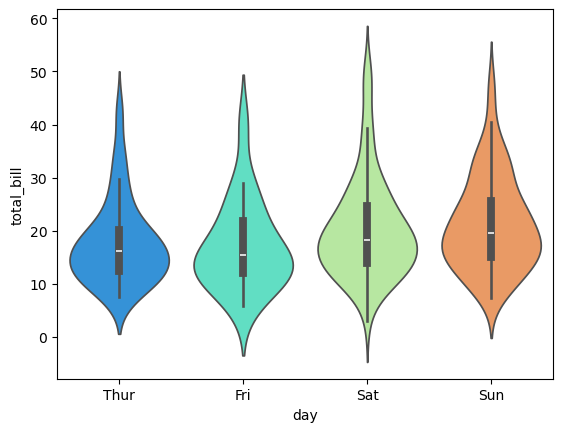

In [248]:
sns.violinplot(x="day", y="total_bill", data=tips,hue= 'day',palette='rainbow')
'''
🔵 What Each Violin Represents
Each colored violin shape corresponds to a day of the week:
    Thur, Fri, Sat, Sun
    Each violin shows the distribution of total_bill values for that day.

📈 The Shape of the Violin
The width of the violin at any vertical point reflects the density (how many bills fall near that amount).
    Wide part ⇒ more bills at that value.
    Narrow part ⇒ fewer bills.
For example:
On Saturday, there is a big bulge around $15–$20 → many customers paid that much.
On Friday, the distribution is also centered around a similar range, but with fewer high-end outliers.

⚫ White Dot: Median
This is the middle value of total bills for that day.

▓ Thick Black Bar: Interquartile Range (IQR)
Shows the middle 50% of the data (from Q1 to Q3).
The length of this bar tells you about the spread in the core of the distribution.

┴ Thin Black Line: Whiskers
These extend to the most extreme values within 1.5× IQR.

They help you detect the presence of outliers (not shown here).

🎨 Color: palette='rainbow'
Seaborn assigns different colors from the 'rainbow' palette to each category on the x-axis (day).

This helps visually separate them.

🟡 Background Color
You’ve likely customized your Matplotlib or Seaborn style or theme (e.g., using plt.style.use() or sns.set_style()), which made the plot background a light yellow instead of white.

🧠 Summary
This plot tells you:
    How total_bill is distributed each day.
    Where most bills cluster (based on violin width).
    The central tendency (median).
    The spread of the middle 50% (IQR).
''';

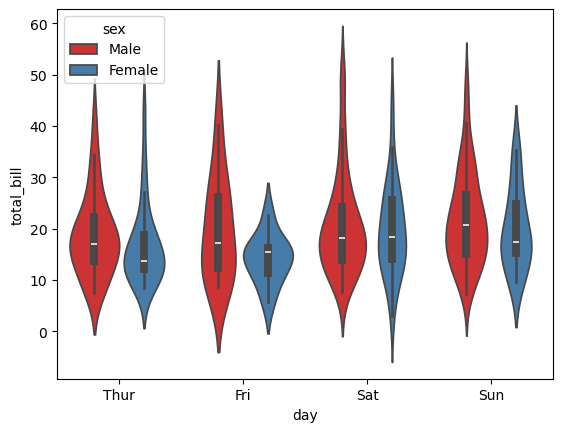

In [249]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1');

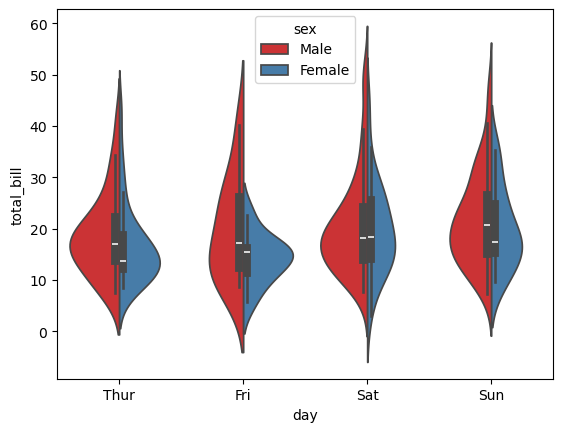

In [250]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1');

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

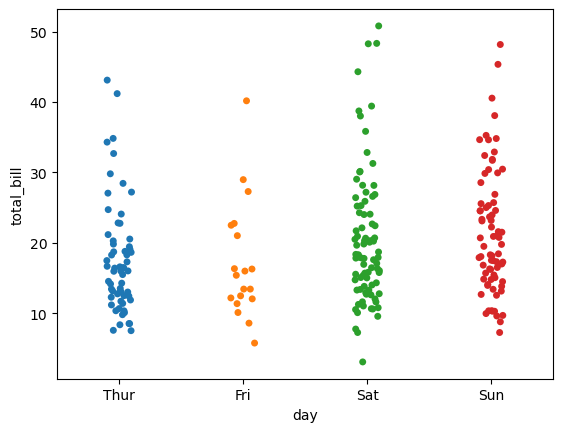

In [251]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='day');
# One issue with this stripplot is that it's hard to tell how many points are stacked on top of each other. To address this, you can add another argument called 'jitter'. The 'jitter' parameter introduces a small amount of random noise to separate overlapping points and make the distribution more visible.

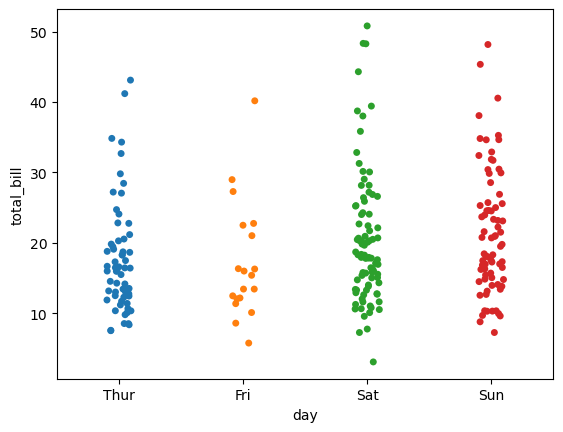

In [252]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, hue='day');
'''
⚠️ The Difference: jitter=True
By default (jitter=False):
All points for the same category (day) are plotted in a vertical line, often overlapping.
This can cause overplotting (points drawn on top of each other).
With jitter=True:
Seaborn adds a small random horizontal shift to each point (within the category's vertical strip).
This makes overlapping points spread out, making the plot easier to read.
🧠 Analogy:
Think of jitter=True as "shaking" the points slightly side-to-side so they don’t all land exactly on top of each other.
''';

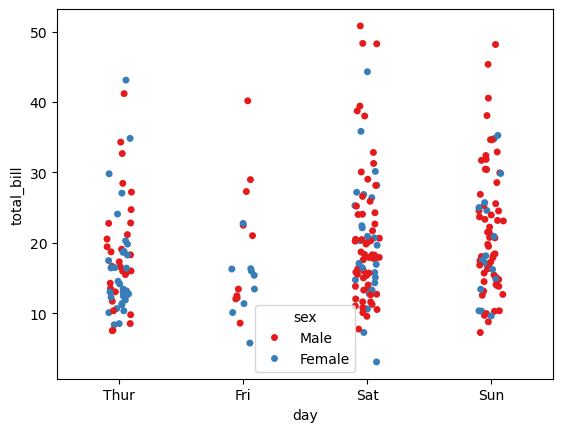

In [253]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1');

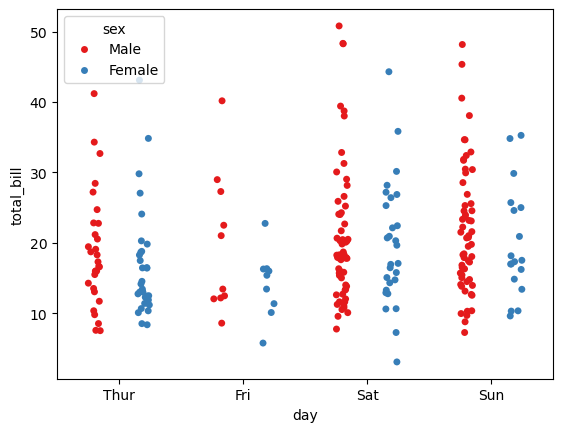

In [254]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True);
# dodge=True  # This separates the points by hue (enabled by default for stripplot with hue)

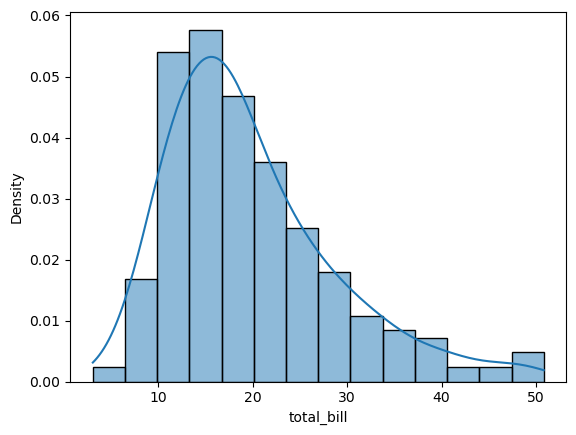

In [255]:
# sns.distplot(tips['total_bill'],kde=False,norm_hist= True);
# # 'norm_hist= True': Normalize the histogram so that the area under the histogram equals 1, instead of showing raw counts.

sns.histplot(tips["total_bill"], kde=True, stat="density");
# stat="density" replaces norm_hist=True, and ensures the area under the histogram = 1.
# kde=False disables the kernel density estimate (just shows the histogram).




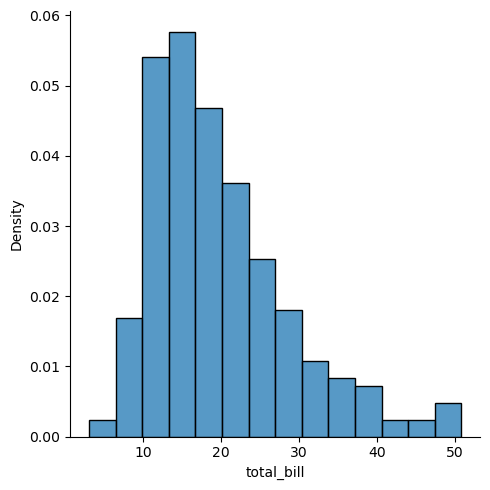

In [256]:
sns.displot(tips["total_bill"], kde=False, stat="density");
# Returns a FacetGrid (useful if you want faceted plots). 
# More flexible for multiple subplots.



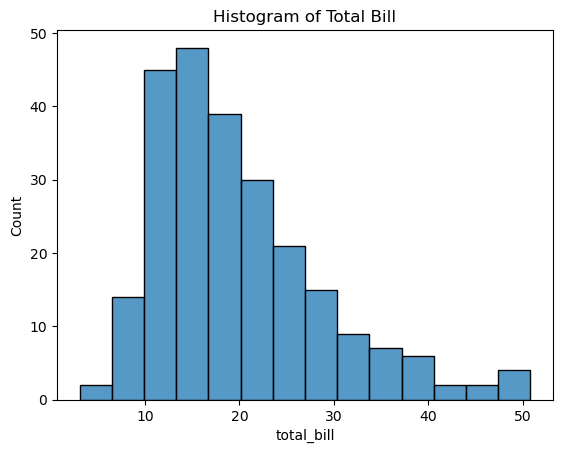

In [257]:
ax = sns.histplot(data=tips, x="total_bill")
ax.set_title("Histogram of Total Bill");

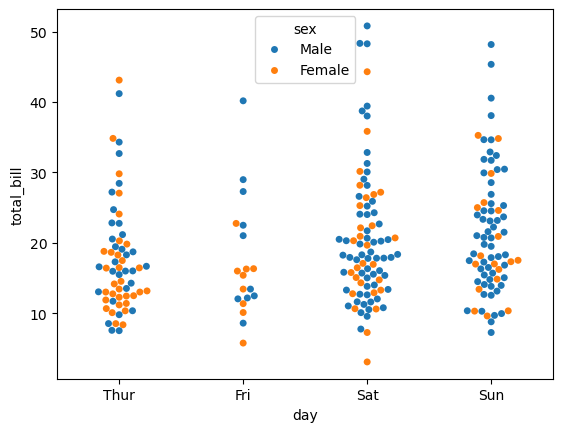

In [258]:
sns.swarmplot(x="day", y="total_bill", data=tips, hue= 'sex'); 
# A swarmplot is very similar to a stripplot, except that the points are adjusted so they don't overlap. This provides a better representation of the distribution of values. It's somewhat like combining a stripplot with a violinplot.

'\nswarmplot\nUses a smart algorithm to avoid overlap.\nPoints are spread out along the categorical axis so that each one is visible.\nSlightly slower for large datasets due to the layout calculations.\n✅ Pros: Every point is visible, no overlap\n❌ Cons: Slower with many points\n\n🎯 stripplot\nPlots all data points in a single line per category.\nPoints may overlap, especially if there are many similar values.\nYou can add jitter=True to randomly spread them out a bit.\n✅ Pros: Fast, simple\n❌ Cons: Overlapping can obscure dense areas\n'

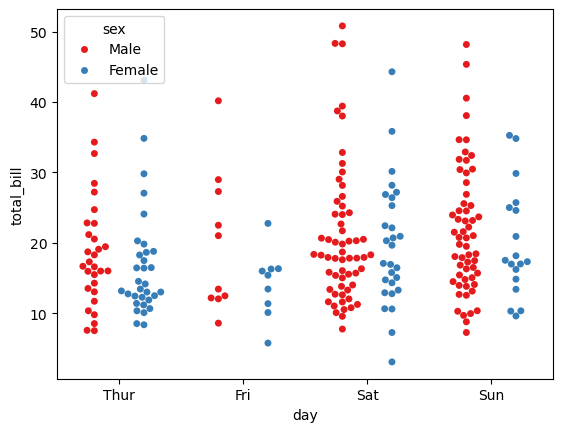

In [259]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True);
'''
swarmplot
Uses a smart algorithm to avoid overlap.
Points are spread out along the categorical axis so that each one is visible.
Slightly slower for large datasets due to the layout calculations.
✅ Pros: Every point is visible, no overlap
❌ Cons: Slower with many points

🎯 stripplot
Plots all data points in a single line per category.
Points may overlap, especially if there are many similar values.
You can add jitter=True to randomly spread them out a bit.
✅ Pros: Fast, simple
❌ Cons: Overlapping can obscure dense areas
'''

### Combining Categorical Plots

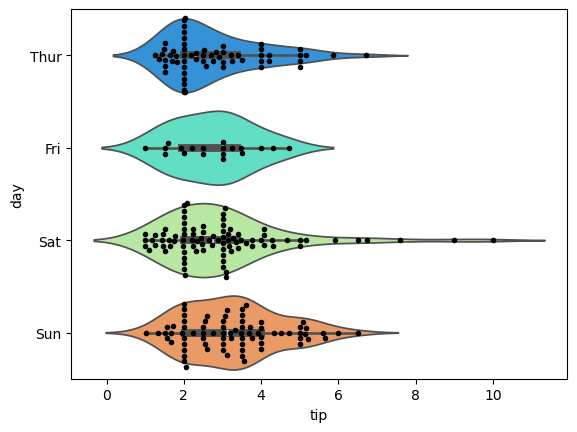

In [268]:
sns.violinplot(x="tip", y="day", data=tips,hue="day", palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=4);

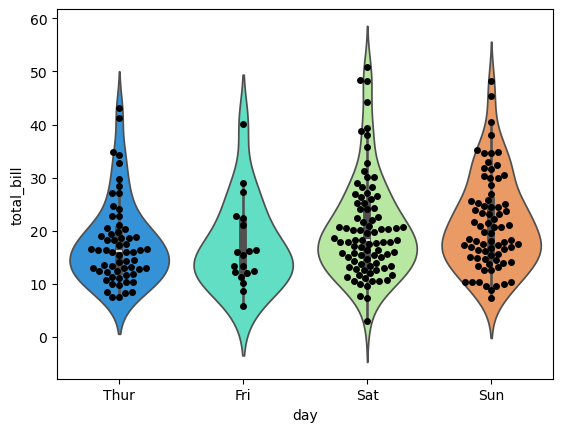

In [264]:
sns.violinplot(x="day", y="total_bill", data=tips,hue="day", palette='rainbow')
sns.swarmplot(x="day", y="total_bill", data=tips,color='black');

## factorplot (catplot)

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

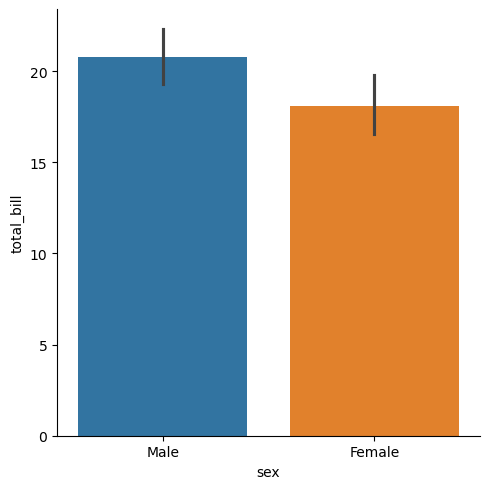

In [262]:
# sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')
# sns.factorplot() was deprecated and removed in Seaborn version 0.11.0+. 
# ✅ Replacement
# Use sns.catplot() instead. It's the modern, more flexible version of factorplot.
sns.catplot(x='sex', y='total_bill', data=tips, hue='sex',kind='bar');
# This does exactly what factorplot used to do, but with the updated API.

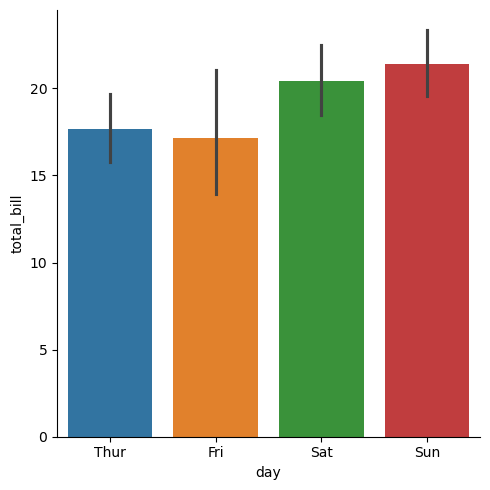

In [ ]:
sns.catplot(x='day', y='total_bill', data=tips, hue='day',kind='bar');
'''
✅ What it shows:
    X-axis (x='day'): Categories for each day (Thur, Fri, Sat, Sun).
    Y-axis (y='total_bill'): The mean of total_bill for each day by default.
    hue='day': Adds different colors for each bar, based on the day.
    kind='bar': Tells Seaborn to create a bar plot (instead of, say, a point plot or boxplot).
So, the plot will display one bar per day on the x-axis, each showing the average total bill for that day, and each bar colored differently based on hue='day'.
'''

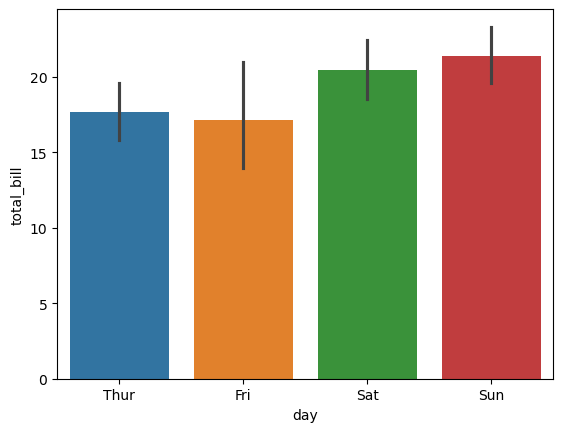

In [272]:
sns.barplot(x='day', y='total_bill', data=tips, hue='day');

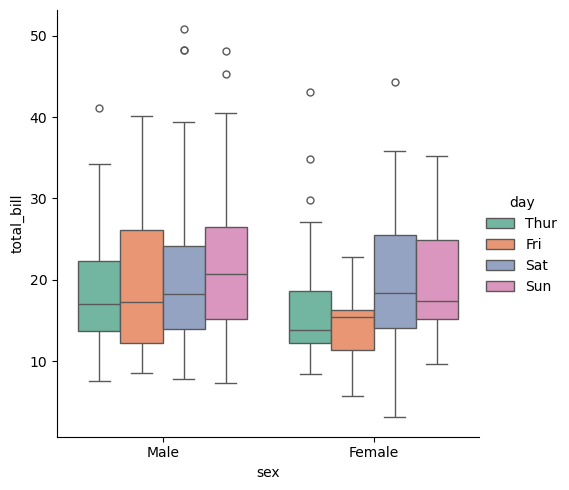

In [263]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='box', hue='day', palette='Set2')
'''
ℹ️ Why This Change?
Seaborn moved toward more intuitive naming.
catplot() stands for “categorical plot” and supports all kinds of plots (bar, box, violin, etc.) through the kind parameter.
''';


# Great Job!